# Assignment: Implementing Gradient Descent and Stochastic Gradient Descent

## Understanding Different Types of Gradient Descent
### Stochastic Gradient Descent (SGD)
Stochastic Gradient Descent updates the model parameters using only one randomly chosen data point per iteration. 

This makes it computationally efficient and allows it to escape local minima, but it can be noisy and less stable compared to other methods. 

The randomness in the updates introduces variance, which can sometimes help in finding a better solution, but may also slow down convergence or cause oscillations.

Mathematically, the update rule for SGD is:
$$ \theta^{(t+1)} = \theta^{(t)} - \alpha \nabla J_i(\theta) $$
where:
- $\theta$ represents the parameters
- $\alpha$ is the learning rate
- $\nabla J_i(\theta)$ is the gradient computed using a single data point $$ i $$


### Mini-Batch Gradient Descent
Mini-Batch Gradient Descent is a compromise between batch and stochastic gradient descent. Instead of using the entire dataset or a single data point, it updates the parameters using a small batch of randomly selected data points. This balances stability and efficiency, making it a commonly used approach in deep learning. Mini-batch gradient descent helps smooth out some of the noise of SGD while still being computationally efficient. The batch size is a hyperparameter that affects convergence speed and accuracy.

The update rule for mini-batch gradient descent is:
$$ \theta^{(t+1)} = \theta^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} \nabla J_i(\theta) $$
where:
- $m$ is the mini-batch size
- $\sum_{i=1}^{m} \nabla J_i(\theta)$ represents the gradient computed over a batch of $m$ data points

### Batch Gradient Descent (Vanilla)
Batch Gradient Descent computes the gradient using the entire dataset at each iteration. 

While this method leads to a smooth convergence, it is computationally expensive, especially for large datasets. 

It tends to be more stable and can find the optimal solution efficiently, but it may take longer compared to SGD and Mini-Batch Gradient Descent.

The update rule for batch gradient descent is:
$$ \theta^{(t+1)} = \theta^{(t)} - \alpha \nabla J(\theta) $$
where:
- $\nabla J(\theta)$ is the gradient computed over the entire dataset

## Task 1: Implement Gradient Descent for a Quadratic Function
1. Define a quadratic function, e.g., $$ f(x) = x^2 $$.
2. Implement a gradient descent to minimize this function.
3. Use different learning rates and visualize the convergence.
4. Plot the function and the gradient descent path.
5. Plot the evolution of loss across iterations

1. f'(x)  = 2x
2. x0 = 3(random initialization of x)
3. learning_rate = 0.01 (to determine the step size while moving towards local minima)
4. gradient = f'(x)

Let perform 3 iterations of gradient descent

1. Iteration 1: x1 = x0 - (learning_rate * gradient) = 3 - (0.01 * (2 * 3)) = 2.94
2. Iteration 2: x2 = 2.94 - (0.01 * (2 * 2.94)) = 2.8812
3. Iteration 3: x3 = 2.823576

From the above three iterations of gradient descent, we can notice that the value of x is decreasing iteration by iteration and will slowly converge to 0 (local minima) by running the gradient descent for more iterations.

For learning_rate = 0.1 x will be like: 1.6; 1.28; 1.024; 0.8192

Iteration 1: x = 8.0, Cost = 64.0
Iteration 2: x = 6.4, Cost = 40.96000000000001
Iteration 3: x = 5.12, Cost = 26.2144
Iteration 4: x = 4.096, Cost = 16.777216
Iteration 5: x = 3.2768, Cost = 10.73741824
Iteration 6: x = 2.62144, Cost = 6.871947673600001
Iteration 7: x = 2.0971520000000003, Cost = 4.398046511104002
Iteration 8: x = 1.6777216000000004, Cost = 2.8147497671065613
Iteration 9: x = 1.3421772800000003, Cost = 1.801439850948199
Iteration 10: x = 1.0737418240000003, Cost = 1.1529215046068475
Iteration 11: x = 0.8589934592000003, Cost = 0.7378697629483825
Iteration 12: x = 0.6871947673600002, Cost = 0.47223664828696477
Iteration 13: x = 0.5497558138880001, Cost = 0.3022314549036574
Iteration 14: x = 0.43980465111040007, Cost = 0.19342813113834073
Iteration 15: x = 0.35184372088832006, Cost = 0.12379400392853807
Iteration 16: x = 0.281474976710656, Cost = 0.07922816251426434
Iteration 17: x = 0.22517998136852482, Cost = 0.050706024009129186
Iteration 18: x = 0.18014398509481985,

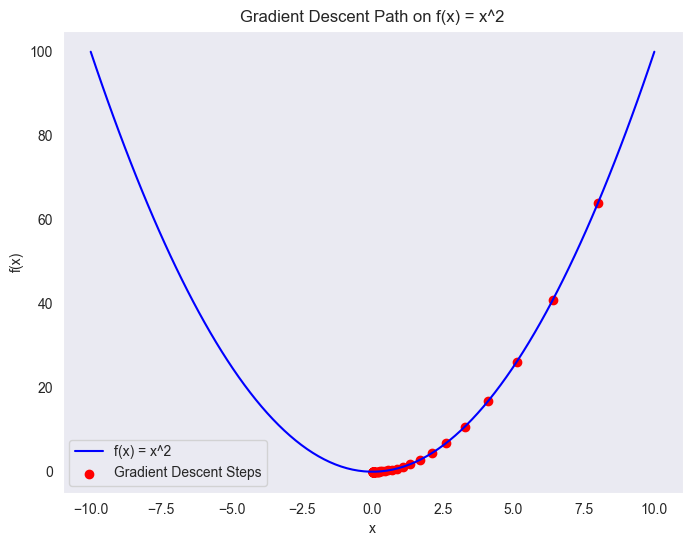

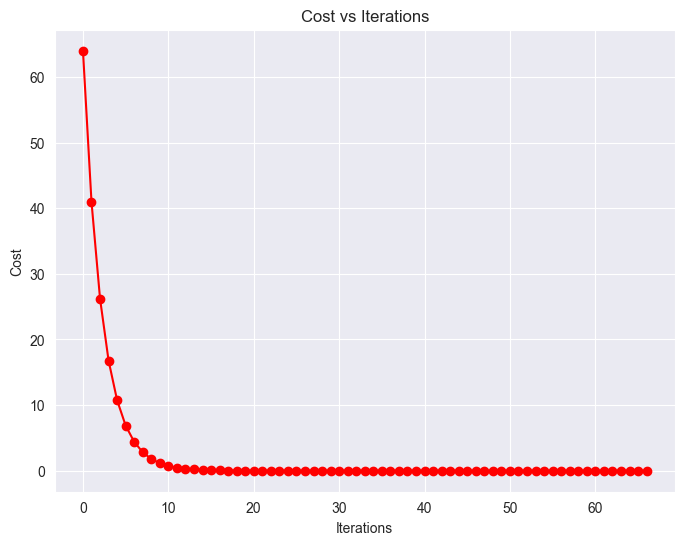

Minimum found at x = 4.017345110647478e-06


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent(start_x, iterations = 100, learning_rate = 0.1, stopping_threshold = 1e-6):

    costs = []
    x = start_x
    x_values = []

    # Estimation of optimal parameters
    for i in range(iterations):
        gradient = 2 * x
        x_new = x - learning_rate * gradient

        cost = x_new ** 2
        costs.append(cost)
        x_values.append(x_new)

        if abs(x_new - x) < stopping_threshold:
            break

        x = x_new
        print(f"Iteration {i + 1}: x = {x}, Cost = {cost}")

    #Plot function and gradient descent path
    x_range = np.linspace(-10, 10, 100)  # X values for plotting
    y_range = x_range**2  # Function f(x) = x^2

    plt.figure(figsize=(8,6))
    plt.plot(x_range, y_range, label="f(x) = x^2", color="blue")
    plt.scatter(x_values, [xi**2 for xi in x_values], color="red", marker='o', label="Gradient Descent Steps")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.title("Gradient Descent Path on f(x) = x^2")
    plt.legend()
    plt.grid()
    plt.show()

    #Visualizing cost for all iterations
    plt.figure(figsize = (8,6))
    plt.plot(range(len(costs)), costs, marker='o', color='red')
    plt.title("Cost vs Iterations")
    plt.ylabel("Cost")
    plt.xlabel("Iterations")
    plt.show()
    return x

x_min = gradient_descent(start_x = 10,learning_rate=0.1)
print(f"Minimum found at x = {x_min}")

## Task 2: Gradient Descent in Higher Dimensions
1. Define a function like $$ f(x, y) = x^2 + y^2 $$.
2. Implement gradient descent for two variables.
3. Visualize the contour plot and the optimization path.
4. Experiment with different initialization points and learning rates.

C:\Users\Арай\AppData\Local\Temp\ipykernel_11720\1710210257.py:62: UserWarning: The following kwargs were not used by contour: 'edgecolor'
  ax2.contour(X, Y, Z, levels=50, cmap='coolwarm', edgecolor='none')


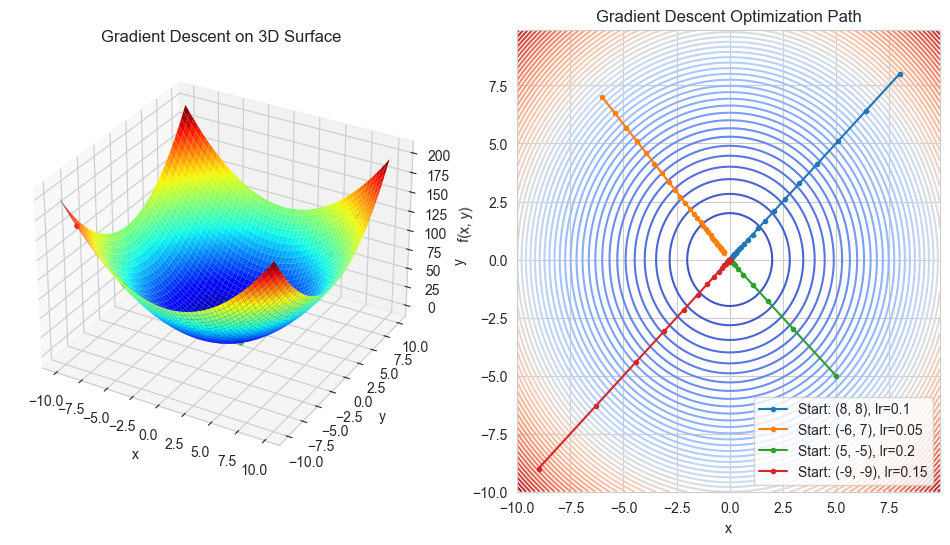

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function to be minimized (a simple quadratic function)
def f(x, y):
    return x**2 + y**2

# Define the partial derivatives of the function with respect to x and y
def df_dx(x, y):
    return 2 * x

def df_dy(x, y):
    return 2 * y

# Define the gradient descent algorithm
def gradient_descent(start_x, start_y, learning_rate, num_iterations):
    # Initialize the parameters
    x = start_x
    y = start_y
    history = [(x, y, f(x, y))]

    # Perform the gradient descent iterations
    for i in range(num_iterations):
        # Calculate the gradients
        grad_x = df_dx(x, y)
        grad_y = df_dy(x, y)

        # Update the parameters
        x = x - learning_rate * grad_x
        y = y - learning_rate * grad_y
        # Save the history of the parameters
        history.append((x, y, f(x, y)))

    return x, y, f(x, y), history

# Define the meshgrid for plotting the function
x_range = np.arange(-10, 10, 0.1)
y_range = np.arange(-10, 10, 0.1)
X, Y = np.meshgrid(x_range, y_range)
Z = f(X, Y)

# Experiment with different initialization points and learning rates
experiments = [
    (8, 8, 0.1, 20),
    (-6, 7, 0.05, 30),
    (5, -5, 0.2, 15),
    (-9, -9, 0.15, 25)
]

fig = plt.figure(figsize=(12, 6))
# 3D Surface plot
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='jet', edgecolor='none')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f(x, y)')
ax1.set_title('Gradient Descent on 3D Surface')

# Contour plot
ax2 = fig.add_subplot(122)
ax2.contour(X, Y, Z, levels=50, cmap='coolwarm')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Gradient Descent Optimization Path')

# Run experiments and plot paths
for start_x, start_y, lr, num_iters in experiments:
    _, _, _, history = gradient_descent(start_x, start_y, lr, num_iters)
    x_hist, y_hist, _ = zip(*history)
    ax1.scatter(x_hist, y_hist, [f(x, y) for x, y in zip(x_hist, y_hist)], marker='o', s=10)
    ax2.plot(x_hist, y_hist, marker='o', markersize=3, label=f'Start: ({start_x}, {start_y}), lr={lr}')

ax2.legend()
plt.show()

## Task 3: Implement Stochastic Gradient Descent (SGD)
1. Generate a synthetic dataset : $$ y = 3x + 5 + \text{noise} $$.
2. Run gradient descent for linear regression.
3. Run stochastic gradient descent and compare results.
4. Plot the regression line and analyze the difference in convergence speed.

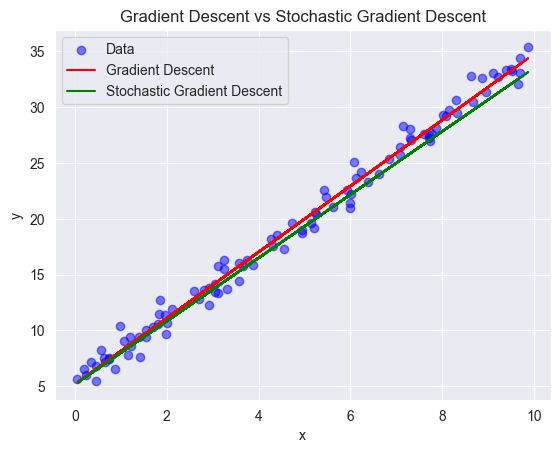

Theta (GD): [5.19644556 2.95688924]
Theta (SGD): [5.14846277 2.83588364]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic dataset
np.random.seed(42)
x = np.random.rand(100, 1) * 10  # Random values between 0 and 10
y = 3 * x + 5 + np.random.randn(100, 1)  # y = 3x + 5 + noise

# Add bias term
X_b = np.c_[np.ones((100, 1)), x]  # Add x0 = 1 to each instance

# Gradient Descent
def gradient_descent(X, y, learning_rate=0.01, n_iterations=1000):
    m, n = X.shape
    theta = np.random.randn(n, 1)  # Random initialization

    for iteration in range(n_iterations):
        gradients = 2/m * X.T.dot(X.dot(theta) - y)
        theta -= learning_rate * gradients

    return theta

# Stochastic Gradient Descent
def stochastic_gradient_descent(X, y, learning_rate=0.01, n_epochs=50):
    m, n = X.shape
    theta = np.random.randn(n, 1)

    for epoch in range(n_epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            theta -= learning_rate * gradients

    return theta

# Run GD and SGD
theta_gd = gradient_descent(X_b, y)
theta_sgd = stochastic_gradient_descent(X_b, y)

# Plot results
plt.scatter(x, y, label="Data", color="blue", alpha=0.5)
plt.plot(x, X_b.dot(theta_gd), label="Gradient Descent", color="red")
plt.plot(x, X_b.dot(theta_sgd), label="Stochastic Gradient Descent", color="green")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Gradient Descent vs Stochastic Gradient Descent")
plt.show()

print("Theta (GD):", theta_gd.ravel())
print("Theta (SGD):", theta_sgd.ravel())


### Task 4
1. Define the multimodal function $$f(x, y) = (x^2 + y^2) * sin(x) * sin(y) + x^2 + y^2$$.
2. Visualize the 3D surface plot as well as the contour plot.
3. What could be a problem for convergence of the algorithm here ?
5. Run the gradient descent algorithm with different initial values and learning rates.
7. Add the optimization path to the contour plot for each initial value.
8. Compare the performance path of gradient descent and stochastic gradient descent for each initial value.



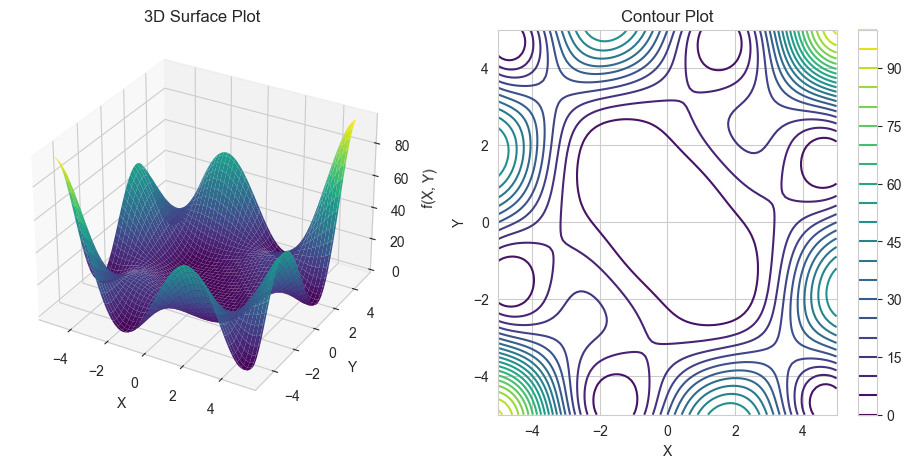

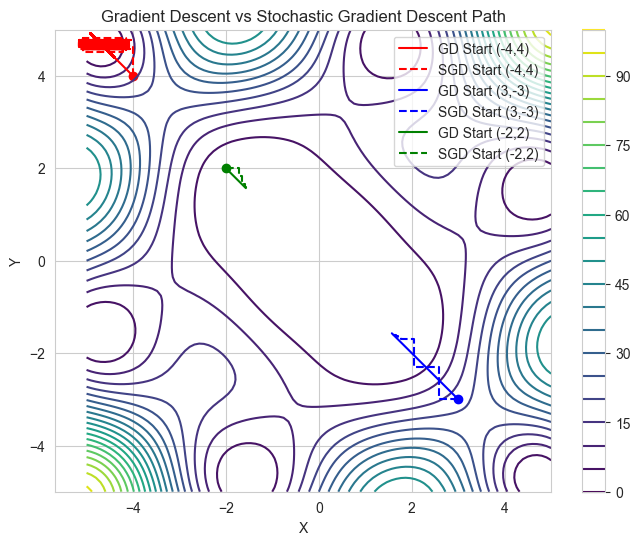

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def f(x, y):
    return (x**2 + y**2) * np.sin(x) * np.sin(y) + x**2 + y**2

def gradient(x, y):
    df_dx = (2*x * np.sin(x) * np.sin(y)) + ((x**2 + y**2) * np.cos(x) * np.sin(y)) + 2*x
    df_dy = (2*y * np.sin(x) * np.sin(y)) + ((x**2 + y**2) * np.sin(x) * np.cos(y)) + 2*y
    return np.array([df_dx, df_dy])

x_vals = np.linspace(-5, 5, 100)
y_vals = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)

# 3D Surface Plot
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis',edgecolor='none')
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("f(X, Y)")
ax1.set_title("3D Surface Plot")

# Contour Plot
ax2 = fig.add_subplot(122)
contour = ax2.contour(X, Y, Z, 20, cmap='viridis')
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.set_title("Contour Plot")
plt.colorbar(contour, ax=ax2)
plt.show()

# Gradient Descent Implementation
def gradient_descent(start, learning_rate=0.01, n_iterations=100):
    x, y = start
    path = [(x, y)]

    for _ in range(n_iterations):
        grad = gradient(x, y)
        x -= learning_rate * grad[0]
        y -= learning_rate * grad[1]
        path.append((x, y))

    return np.array(path)

# Stochastic Gradient Descent Implementation
def stochastic_gradient_descent(start, learning_rate=0.01, n_iterations=100):
    x, y = start
    path = [(x, y)]

    for _ in range(n_iterations):
        grad = gradient(x, y)
        index = np.random.randint(2)  # Choose a random direction
        if index == 0:
            x -= learning_rate * grad[0]
        else:
            y -= learning_rate * grad[1]
        path.append((x, y))

    return np.array(path)

# Test different initial points and learning rates
initial_points = [(-4, 4), (3, -3), (-2, 2)]
learning_rate = 0.05

fig, ax = plt.subplots(figsize=(8, 6))
contour = ax.contour(X, Y, Z, 20, cmap='viridis')
plt.colorbar(contour, ax=ax)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title("Gradient Descent vs Stochastic Gradient Descent Path")

colors = ['r', 'b', 'g']
for i, (x0, y0) in enumerate(initial_points):
    gd_path = gradient_descent((x0, y0), learning_rate)
    sgd_path = stochastic_gradient_descent((x0, y0), learning_rate)

    ax.plot(gd_path[:, 0], gd_path[:, 1], color=colors[i], label=f'GD Start ({x0},{y0})')
    ax.plot(sgd_path[:, 0], sgd_path[:, 1], '--', color=colors[i], label=f'SGD Start ({x0},{y0})')
    ax.scatter(x0, y0, color=colors[i], marker='o')

ax.legend()
plt.show()


## SKlearn regressions library

- Take one dataset we already used for previous weeks. 
- Prepare data to train a model
- Fit a linear regression with OLS method
- Fit a linear regression with gradient descent (look at sklearn documentation to do so)
- Compare and explain the results

OLS Regression Results:
MSE: 217488143163.6060, R2: 0.6872
Coefficients: [ 3.15794399e+04 -1.41000820e+00  1.04561739e+04  8.83828990e+01
  1.22937266e+04 -3.15955561e+04 -8.42344676e+04  1.55644931e+05
 -1.57599279e+05 -2.28488921e+05 -3.22559379e+05 -4.59263495e+05
  2.45947274e+04 -5.32798329e+04  2.69297447e+06 -3.61129178e+04], Intercept: -63412998.19110362

SGD Regression Results:
MSE: 256814715275.4003, R2: 0.6306
Coefficients: [ 147505.76588274  -49760.79510125    6154.74146724   39079.33845479
  427577.12749058  -50271.43211826  561680.47528707   89505.8196519
  521615.27189755 -105082.92336178  -47629.26550858 -163105.76675933
   -7500.69382389  -25196.9546675   176659.30372939   -6766.50143156], Intercept: [656982.37400295]


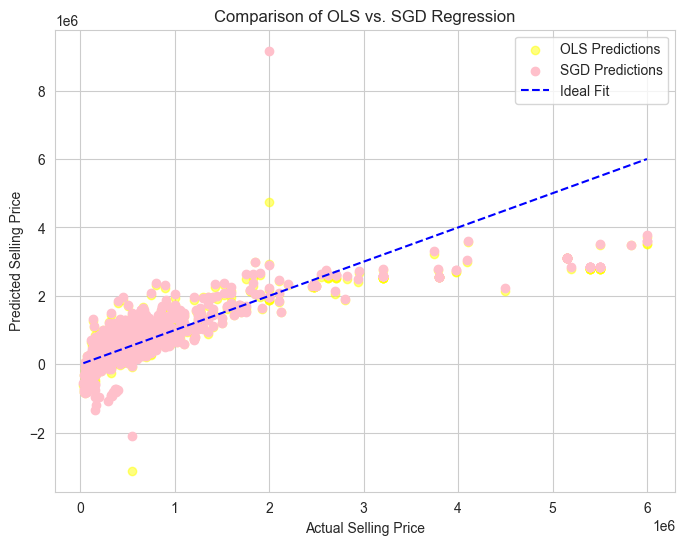

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

cars = pd.read_csv("cars.csv")
cars = cars[['year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats']].dropna()
cars = pd.get_dummies(cars, columns=['fuel', 'seller_type', 'transmission', 'owner'], drop_first=True)

X = cars.drop(columns=['selling_price'])
y = cars['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ols_model = LinearRegression()
ols_model.fit(X_train, y_train)
ols_pred = ols_model.predict(X_test)

# Fit Linear Regression using Gradient Descent (SGDRegressor)
sgd_model = SGDRegressor(max_iter=100000, learning_rate='optimal', eta0=0.01, random_state=42)
sgd_model.fit(X_train_scaled, y_train)
sgd_pred = sgd_model.predict(X_test_scaled)

# Evaluate models
ols_mse = mean_squared_error(y_test, ols_pred)
ols_r2 = r2_score(y_test, ols_pred)
sgd_mse = mean_squared_error(y_test, sgd_pred)
sgd_r2 = r2_score(y_test, sgd_pred)

# Print comparison
print("OLS Regression Results:")
print(f"MSE: {ols_mse:.4f}, R2: {ols_r2:.4f}")
print(f"Coefficients: {ols_model.coef_}, Intercept: {ols_model.intercept_}")

print("\nSGD Regression Results:")
print(f"MSE: {sgd_mse:.4f}, R2: {sgd_r2:.4f}")
print(f"Coefficients: {sgd_model.coef_}, Intercept: {sgd_model.intercept_}")

# Plot results
plt.figure(figsize=(8, 6))
plt.scatter(y_test, ols_pred, color='yellow', alpha=0.5, label='OLS Predictions')
plt.scatter(y_test, sgd_pred, color='pink', label='SGD Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', linestyle='dashed', label='Ideal Fit')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.legend()
plt.title('Comparison of OLS vs. SGD Regression')
plt.show()
